## 作業
### 目標: 建立一深度學習模型預測客戶是否流失
- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

### 資料預處理

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df = df.iloc[ : , 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
import pandas
geography = pandas.get_dummies(df['Geography'])
del geography['France']
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
import pandas
gender = pandas.get_dummies(df['Gender'])
del gender['Male']
gender.head()

,Female
0,1
1,1
2,1
3,1
4,1


In [0]:
customer = pandas.concat([df, geography, gender], axis = 1)
del customer['Geography']
del customer['Gender']

In [12]:
customer.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
 11  Female           10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [14]:
customer.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Female'],
      dtype='object')

In [0]:
X = customer[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Female']]
y = customer['Exited']

In [17]:
X.shape

(10000, 11)

In [18]:
y.shape

(10000,)

### 切分成訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [20]:
x_train.shape

(8000, 11)

In [21]:
x_test.shape

(2000, 11)

In [22]:
y_train.shape

(8000,)

In [23]:
y_test.shape

(2000,)

### 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [0]:
x_test = sc.transform(x_test)

### 建構模型

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 5,  activation = 'relu', input_dim = 11))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units = 5,  activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train, y_train,
                    batch_size = 30,
                    epochs=100,
                    verbose=1,
                    metrics = ['accuracy'],
                    validation_data = (x_test,y_test))

Epoch 1/100
267/267 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7371 - val_loss: 0.5232 - val_accuracy: 0.8035
Epoch 2/100
267/267 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7943 - val_loss: 0.4792 - val_accuracy: 0.8035
Epoch 3/100
267/267 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7945 - val_loss: 0.4523 - val_accuracy: 0.8035
Epoch 4/100
267/267 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7944 - val_loss: 0.4323 - val_accuracy: 0.8035
Epoch 5/100
267/267 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7968 - val_loss: 0.4203 - val_accuracy: 0.8055
Epoch 6/100
267/267 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8056 - val_loss: 0.4142 - val_accuracy: 0.8170
Epoch 7/100
267/267 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8070 - val_loss: 0.4098 - val_accuracy: 0.8175

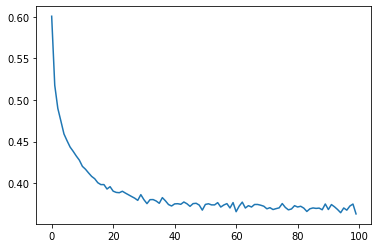

In [38]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('loss'))), history.history.get('loss'))

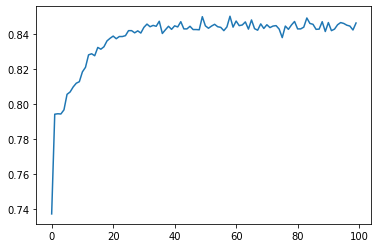

In [39]:
from matplotlib import pyplot as plt
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

## 評估模型準確度

In [0]:
import numpy as np
predicted = model(x_test).numpy().flatten()
y_pred = (predicted > 0.5).astype(int)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8635

In [47]:
confusion_matrix(y_test, y_pred)

array([[1544,   63],
       [ 210,  183]])

##請繪製ROC Curve, 並求出 AUC

In [0]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, predicted)

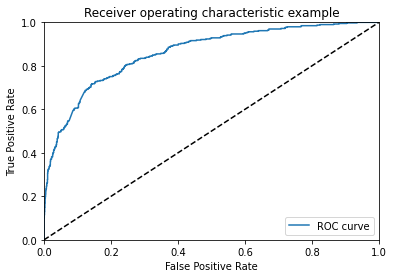

In [55]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.8616113346348909

In [52]:
#ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

clf5 = GradientBoostingClassifier()
clf5.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

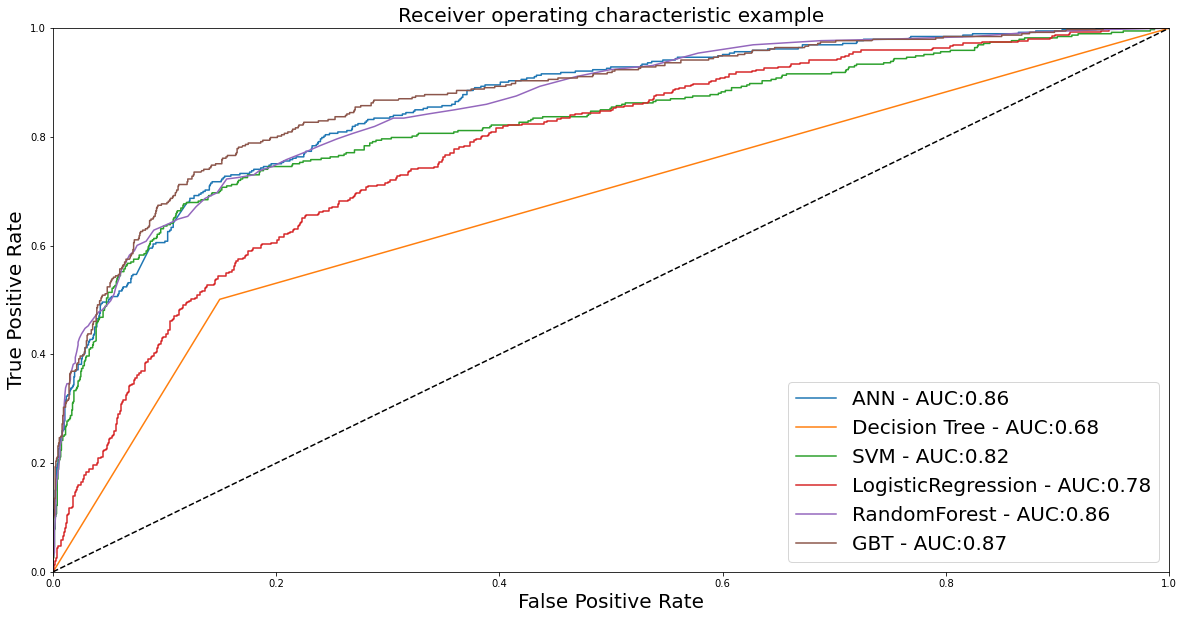

In [53]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4,clf5], 
                      ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GBT']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 驗證碼識別

In [9]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip

--2020-04-11 03:54:05--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/data/captcha_jpg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818150 (3.6M) [application/zip]
Saving to: ‘captcha_jpg.zip’

captcha_jpg.zip     100%[===================>]   3.64M  20.2MB/s    in 0.2s    

2020-04-11 03:54:05 (20.2 MB/s) - ‘captcha_jpg.zip’ saved [3818150/3818150]



In [0]:
! unzip captcha_jpg.zip > 1.log

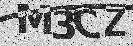

In [11]:
from PIL import Image
Image.open('data/994.jpg')

In [0]:
import pandas
captcha =  pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/output_captua.csv', usecols=['captcua', 'file'])
captcha.columns = ['captcha', 'file']

In [0]:
captcha = captcha[captcha['file'].notnull()]

In [0]:
captcha['file'] = captcha['file'].map(lambda e: 'data/{}.jpg'.format(int(e)) )

In [0]:
captcha.reset_index(inplace=True)
del captcha['index']

In [16]:
captcha.head()

,captcha,file
0,4ay2,data/1.jpg
1,qmqh,data/2.jpg
2,kc3c,data/3.jpg
3,1549,data/4.jpg
4,5rqz,data/5.jpg


In [17]:
len(captcha)

998

In [18]:
from PIL import Image
import numpy as np
img = Image.open('data/3.jpg')
img = img.resize((135,47))
#img
im = np.array(img)
im.shape

(47, 135, 3)

## 建立 X 與 Y

In [19]:
characters = '0123456789abcdefghijklmnopqrstuvwxyz'
height, width = 47,135
n_len = 4
n_class = len(characters)
print(height, width, n_class,n_len)

47 135 36 4


In [20]:
X = np.zeros((len(captcha), height, width, 3), dtype=np.float32)
y = [np.zeros((len(captcha), n_class), dtype=np.uint8) for i in range(n_len)]
X.shape, y[0].shape, len(y)

((998, 47, 135, 3), (998, 36), 4)

In [0]:
for i in captcha.index:
    random_str = captcha.loc[i,'captcha']
    fname = captcha.loc[i,'file']
    img = Image.open(fname)
    img = img.resize((width, height))
    im = np.array(img)
    X[i] = im * 1.0 / 255.0
    for j, ch in enumerate(random_str):
        y[j][i, :] = 0
        y[j][i, characters.find(ch)] = 1

In [22]:
X[0].shape

(47, 135, 3)

In [23]:
y[0][0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
y[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
import random
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    while True:
        for i in range(batch_size):
            rand_index = random.choice(captcha.index)
            random_str = captcha.loc[rand_index,'captcha']
            fname = captcha.loc[rand_index,'file']
            img = Image.open(fname)
            img = img.resize((width, height))
            im = np.array(img)
            X[i] = im / 255.0

            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

In [0]:
#for x1, y1 in gen(batch_size=32):
#  print(x1, y1)

## 建立 CNN 模型

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [0]:
input_tensor = Input((height, width, 3))

x = input_tensor
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x) 

x = Flatten()(x)
x = Dropout(0.25)(x)

In [30]:
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]

model = Model(inputs=input_tensor, outputs=x)

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 47, 135, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 45, 133, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 43, 131, 64)  36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 21, 65, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model.fit_generator(gen(batch_size=32),      # 每次生成器會產生32筆小批量的資料
                    epochs=5,                # 總共跑5個訓練循環
                    steps_per_epoch=1000,
                    #callbacks=cbks,          # 保存最好的模型到檔案
                    validation_data=gen(),   # 驗證資料也是用生成器來產生
                    validation_steps=40      # 用40組資料來驗證
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 28s 28ms/step - loss: 1.9669 - c1_loss: 0.4855 - c2_loss: 0.4953 - c3_loss: 0.4950 - c4_loss: 0.4911 - c1_accuracy: 0.8770 - c2_accuracy: 0.8743 - c3_accuracy: 0.8788 - c4_accuracy: 0.8758 - val_loss: 0.3907 - val_c1_loss: 0.1268 - val_c2_loss: 0.0898 - val_c3_loss: 0.0627 - val_c4_loss: 0.1115 - val_c1_accuracy: 0.9836 - val_c2_accuracy: 0.9797 - val_c3_accuracy: 0.9867 - val_c4_accuracy: 0.9852
Epoch 2/5
1000/1000 [==============================] - 27s 27ms/step - loss: 0.3647 - c1_loss: 0.0966 - c2_loss: 0.0923 - c3_loss: 0.0786 - c4_loss: 0.0971 - c1_accuracy: 0.9822 - c2_accuracy: 0.9829 - c3_accuracy: 0.9873 - c4_accuracy: 0.9828 - val_loss: 0.2572 - val_c1_loss: 0.0499 - val_c2_loss: 0.0598 - val_c3_loss: 0.0753 - val_c4_loss: 0.0722 - val_c1_accuracy: 0.9852 - val_c2_accuracy: 0.9812 - val_c3_accuracy: 0.9844 - val_c4_accuracy: 0.9781
Epoch 3/5
1000

In [0]:
model.save('captcha.h5')

In [0]:
import requests
from bs4 import BeautifulSoup
headers2 = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'  
}

def getCaptcha():
    rs = requests.session()
    res = rs.get('https://irs.thsrc.com.tw/IMINT/', headers = headers2)
    soup = BeautifulSoup(res.text, 'lxml')
    print(res.text)
    domain = 'https://irs.thsrc.com.tw'
    imgsrc = soup.select_one('img#BookingS1Form_homeCaptcha_passCode').get('src')
    imgurl = domain + imgsrc
    res2 = rs.get(imgurl, headers = headers2)
    with open('prediction.jpg', 'wb') as f:
        f.write(res2.content)
    


In [0]:
#getCaptcha()

In [40]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/prediction.jpg

--2020-04-11 04:03:13--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/prediction.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3660 (3.6K) [image/jpeg]
Saving to: ‘prediction.jpg’

prediction.jpg      100%[===================>]   3.57K  --.-KB/s    in 0s      

2020-04-11 04:03:13 (74.0 MB/s) - ‘prediction.jpg’ saved [3660/3660]



In [61]:
from PIL import Image
import numpy as np
img = Image.open('data/995.jpg')
img = img.resize((135,47))
#img
im = np.array(img)
im.shape
#im

(47, 135, 3)

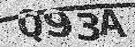

In [62]:
img

In [0]:
X_predict = np.zeros((1, height, width, 3), dtype=np.uint8)
X_predict[0] = im / 255.0


In [64]:
X_predict[0].shape

(47, 135, 3)

In [65]:
for p in model(X_predict):
  print(characters[(np.argmax(p.numpy()))])

q
9
3
a


## YOLO

### 複製 darknet

In [2]:
! git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (3918/3918), done.


In [3]:
! cd darknet; head Makefile  

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


## 修改 Makefile
- GPU=1
- OPENCV=1

In [3]:
! cd darknet; head Makefile  

GPU=1
CUDNN=0
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


### 編譯 YOLO

In [4]:
! cd darknet; make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [5]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-11 06:23:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   459KB/s    in 6m 53s  

2020-04-11 06:30:33 (586 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

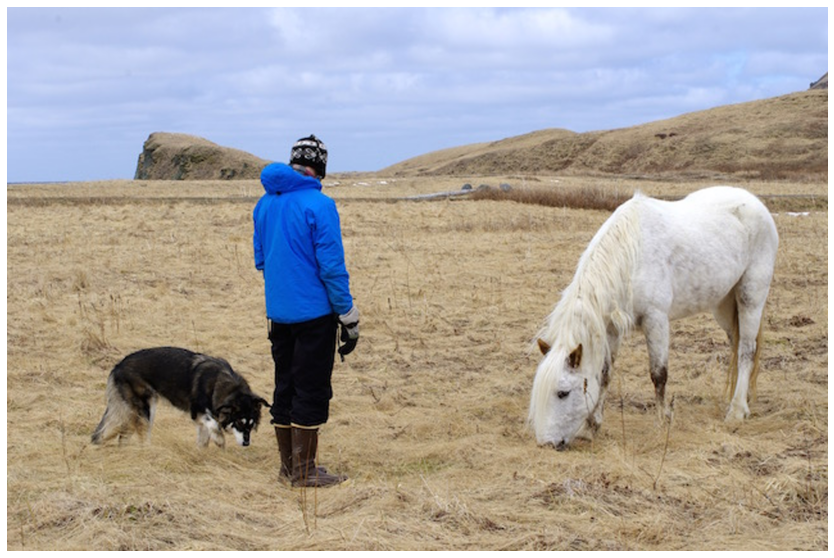

In [8]:
imShow('darknet/data/person.jpg')

In [9]:
! cd darknet ; ./darknet detect cfg/yolov3.cfg ../yolov3.weights data/person.jpg -dont-show

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

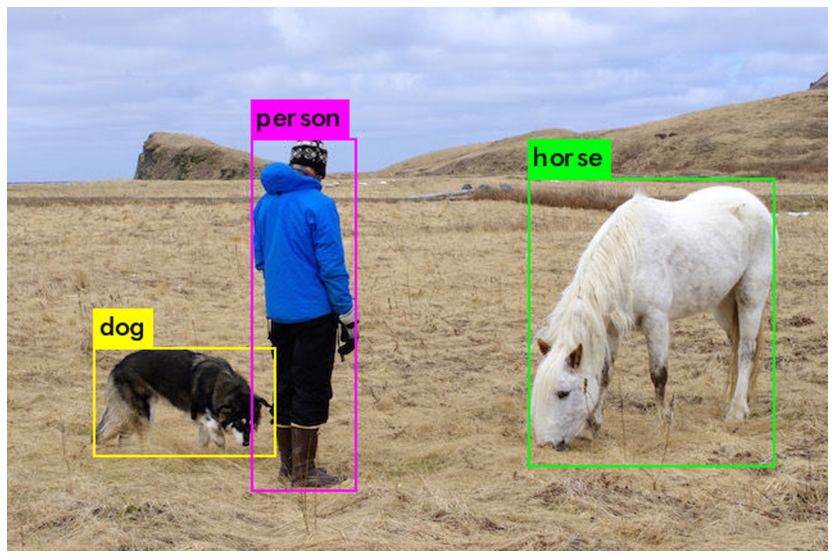

In [10]:
imShow('darknet/predictions.jpg')

In [12]:
! wget https://s.yimg.com/ny/api/res/1.2/2oYcTjWr3cJOVs.ejVxqnw--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9MTI4MDtoPTk2MA--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2019-11/aff19d50-0912-11ea-9ef7-92d50932c933
! mv aff19d50-0912-11ea-9ef7-92d50932c933 chilin.jpg

--2020-04-11 06:34:24--  https://s.yimg.com/ny/api/res/1.2/2oYcTjWr3cJOVs.ejVxqnw--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9MTI4MDtoPTk2MA--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2019-11/aff19d50-0912-11ea-9ef7-92d50932c933
Resolving s.yimg.com (s.yimg.com)... 69.147.64.34, 69.147.64.33, 2001:4998:60:800::1105, ...
Connecting to s.yimg.com (s.yimg.com)|69.147.64.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123689 (121K) [image/jpeg]
Saving to: ‘aff19d50-0912-11ea-9ef7-92d50932c933.1’

aff19d50-0912-11ea- 100%[===================>] 120.79K  --.-KB/s    in 0.06s   

2020-04-11 06:34:24 (2.11 MB/s) - ‘aff19d50-0912-11ea-9ef7-92d50932c933.1’ saved [123689/123689]



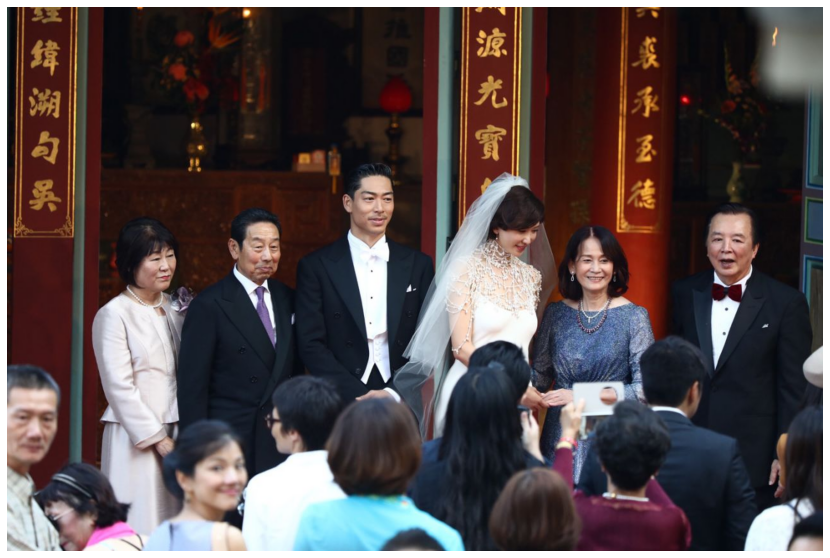

In [13]:
imShow('chilin.jpg')

In [15]:
! cd darknet ; ./darknet detect cfg/yolov3.cfg ../yolov3.weights ../chilin.jpg -dont-show

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

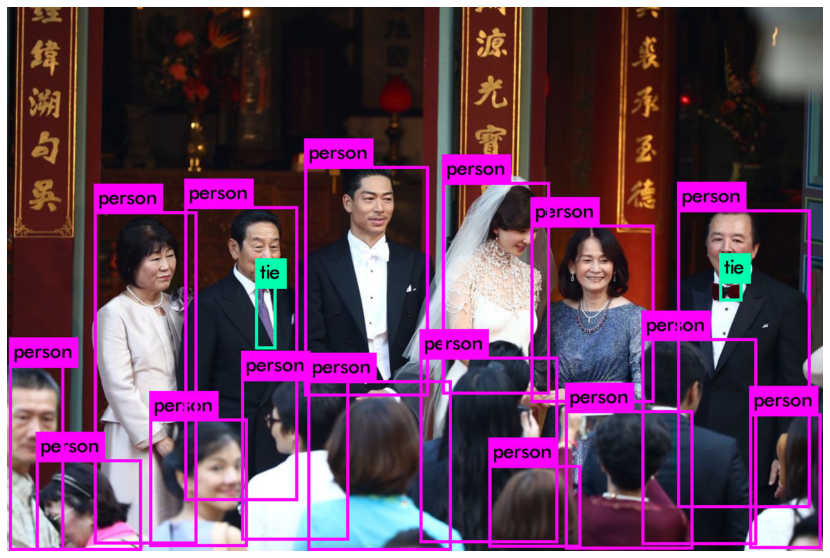

In [16]:
imShow('darknet/predictions.jpg')